In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
import XCrTools as tools
t0 = time.time()

In [2]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

## Loading XCrystal configuration

In [3]:
xcr = XCrystal(XCr_path+'/config/C400_9p8keV_Laue-hemi-sphere-2D.yaml')
pp=xcr.configure(0,0)

Geometry file was provided
No deformation model was selected


In [4]:
xcr.cr_mask.shape

(800, 1, 600)

## Defining single realization reflection object

In [5]:

def single_realization_with_data(delta_theta,omega):
    
    xcr = XCrystal(XCr_path+'/config/C400_9p8keV_Laue-hemi-sphere-2D.yaml',omega)
    xcr.configure(delta_theta,0)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [6]:
omega0=9831

 ## Running beam propagation

In [7]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(-10e-6,omega0)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Geometry file was provided
No deformation model was selected


Beam propagation progress: 100%|██████████| 600/600 [00:01<00:00, 484.22it/s]

Photon energy (omega):  9831 ; Reflectivity:  0.0042032602005617 ; Transmission:  0.9931335530657073


## Determining relative phase between reflected and transmitted fields

In [8]:
Iy=0
ket12=np.sum(np.sum(U1_xyz[0,:,:,:]*np.conj(U2_xyz[0,:,:,:]),axis=0),axis=0)
ket21=np.sum(np.sum(U2_xyz[0,:,:,:]*np.conj(U1_xyz[0,:,:,:]),axis=0),axis=0)+1e-30
thet=np.unwrap(np.angle(-ket12/ket21))



In [9]:


Ints=np.abs(U1_xyz[0,:,:,:] + U2_xyz[0,:,:,:]*np.exp(1j*thet/2))**2
Ints2=np.abs(U1_xyz[0,:,:,:]*0 + U2_xyz[0,:,:,:]*np.exp(1j*thet/2))**2
Ints1=np.abs(U1_xyz[0,:,:,:] + 0*U2_xyz[0,:,:,:]*np.exp(1j*thet/2))**2
SumInts=np.abs(U1_xyz[0,:,:,:])**2 + np.abs(U2_xyz[0,:,:,:])**2

## Displaying results

(-60.0, 60.0)

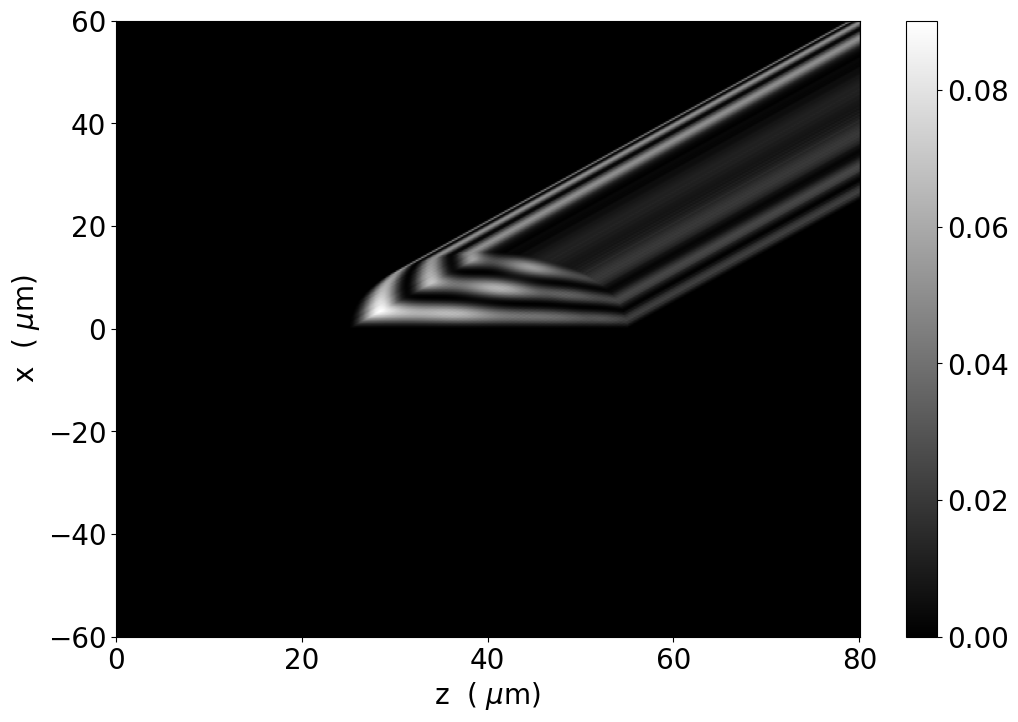

In [10]:
plt.imshow(Ints1[:,Iy,:]**1,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6], aspect='auto',cmap='gray')
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()
#plt.xlim(5,6)
plt.ylim(-60,60)

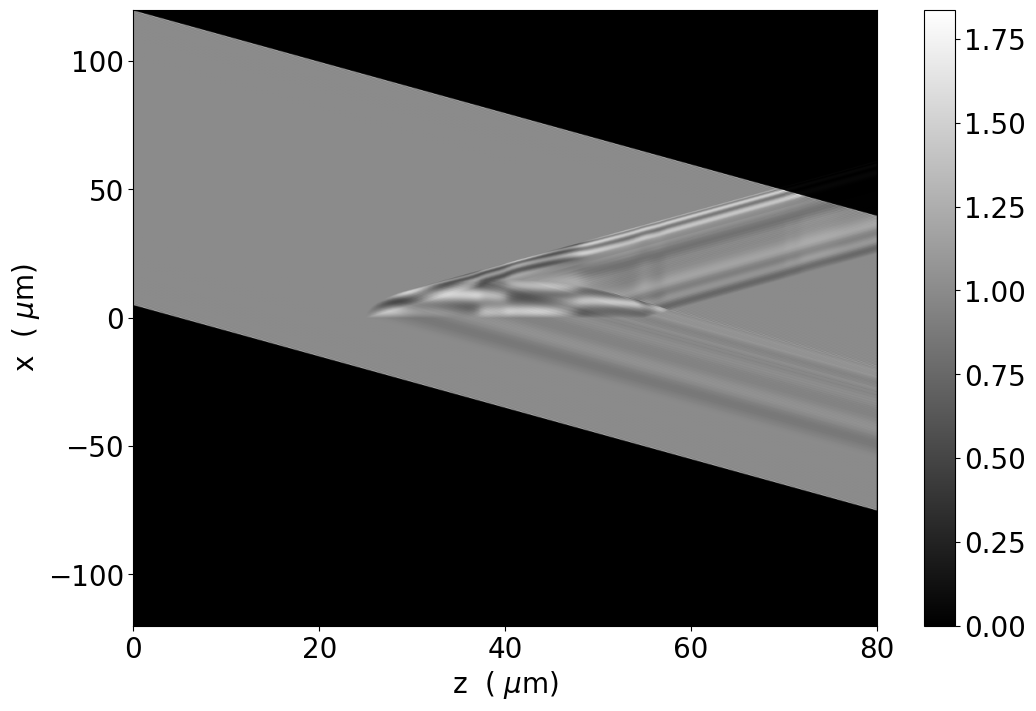

In [11]:
plt.imshow(Ints[:,Iy,:]**1,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6], aspect='auto',cmap='gray')
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()
#plt.xlim(5,6)
#plt.ylim(-60,60)

In [12]:
SumInts=np.abs(U1_xyz[0,:,:,:])**2 + np.abs(U2_xyz[0,:,:,:])**2
En=np.sum(np.sum(Ints,axis=0),axis=0) 
EnSumInt=np.sum(np.sum(SumInts,axis=0),axis=0) 

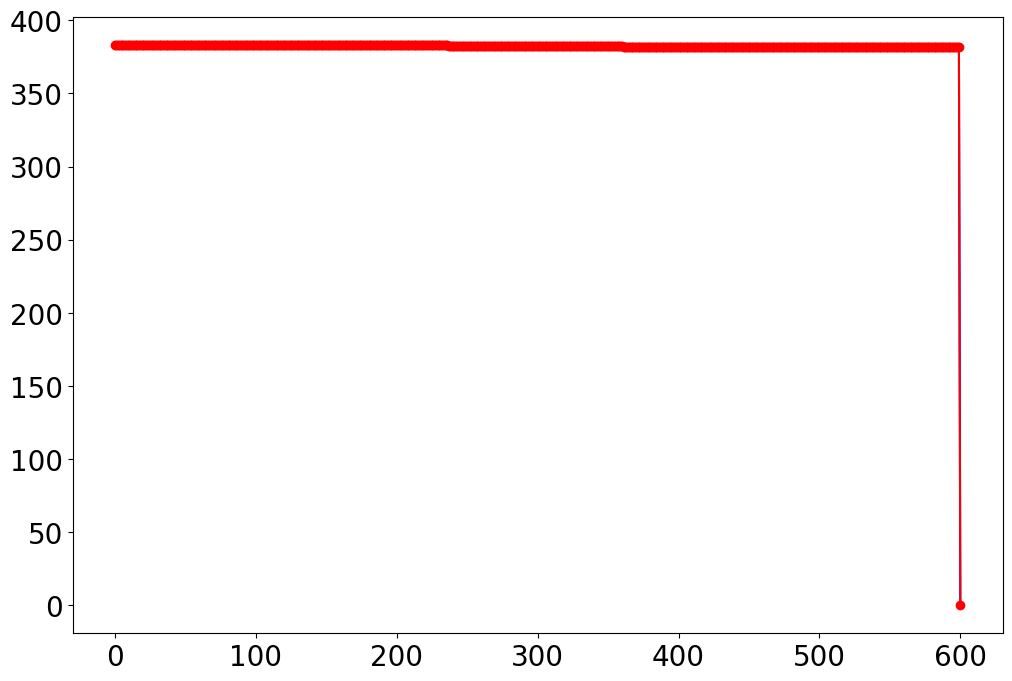

In [13]:
plt.plot(En,'b.-')
plt.plot((EnSumInt),'ro-')
#plt.ylim(80000,100000)
plt.show()

In [14]:
t1 = time.time()
t1-t0

2.3139240741729736

In [15]:
xcr.cr_mask.shape

(800, 1, 600)